In [1]:
%load_ext autoreload
%autoreload 2

import particle as pt
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplhep
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import time
from matplotlib.colors import LogNorm
import uproot.models
mplhep.style.use(mplhep.style.ROOT)
from pprint import pprint
from tqdm import tqdm
import polars as pl
import sys
import os
import particle
# using getlogin() returning username
user_name = os.getlogin()

sys.path.append(f'/home/{user_name}/Documents/Atmos_Pandora/apc_atmo_repo/Anatree/')
sys.path.append(f'/home/henrique/Documents/Atmos_Pandora/apc_atmo_repo/personal/Henrique/Analysis/pida/')
from anatree_class import Anatree
from PIDA_class import PIDA
from  ana_tools import *


plt.rcParams.update({'font.size': 23,
                     'grid.linestyle': '--',
                     'axes.grid': True,
                     'figure.autolayout': True,
                     'figure.figsize': [14,6]
                     })



Reading nu files... 33/33
Reading geant files... 33/33





Text(0, 1, 'Ratio not contained')

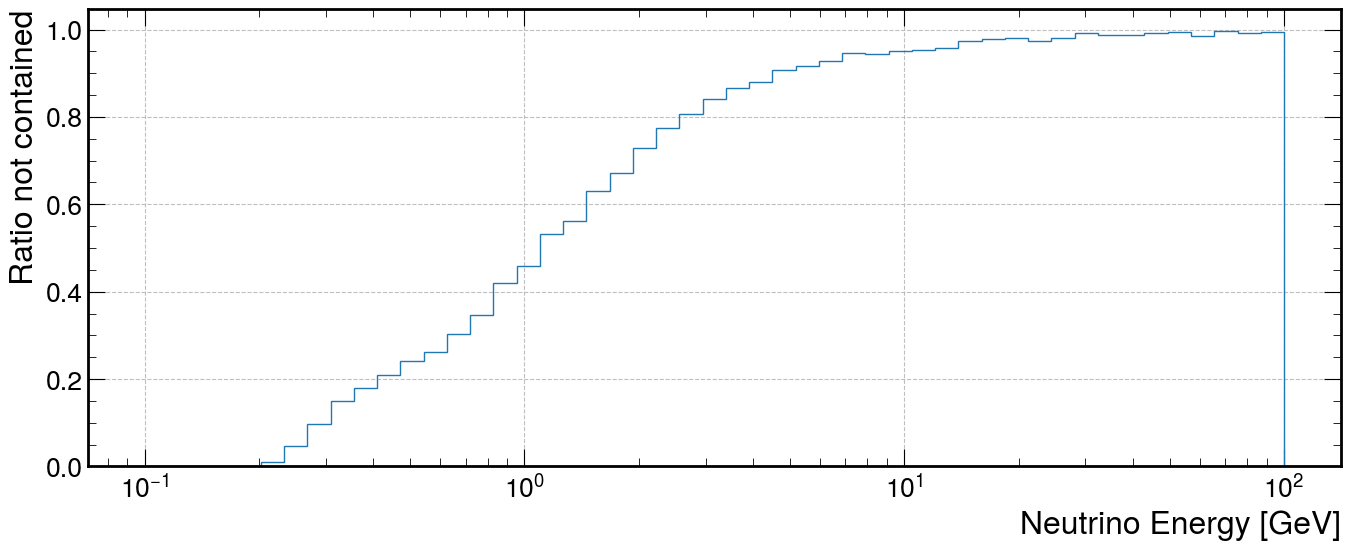

In [4]:
anatree = Anatree("", load_data=False)
anatree.read_parquet('/home/henrique/Documents/Atmos_Pandora/apc_atmo_repo/personal/Henrique/Analysis/ereco2/data/parquet_anatree_modified_chi2_llhd_chi2_no_angle_correction/')
def select_numu_cc(df:pl.DataFrame):
    df = df.filter(
        (pl.col('nuPDG_truth').abs() == 14) & (pl.col('ccnc_truth')==0)
    )
    return df
dfnu = select_numu_cc(anatree.nu.collect())
binse = np.logspace(-1,2,50)
hnc, b = np.histogram(dfnu.filter(pl.col("LongestTrackContNumu")==0)['enu_truth'], bins=binse)
hc, b = np.histogram(dfnu.filter(pl.col("LongestTrackContNumu")==1)['enu_truth'], bins=binse)

hratio = np.divide(hnc,(hnc+hc), out=np.zeros_like(hc, dtype=np.float64), where=hc!=0)
plt.hist(b[:-1], b, weights=hratio, histtype='step');
# plt.ylim(0.8,1)
plt.xscale('log')
plt.xlabel('Neutrino Energy [GeV]')
plt.ylabel('Ratio not contained')